In [1]:
import tensorflow as tf
import numpy as np
import singular_fool
import matplotlib.pyplot as plt
from keras import applications
from keras.applications.vgg19 import preprocess_input, decode_predictions
from img_utils import load_images
from keras import backend as K
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Load example images
imgs = load_images('imgs/').astype(float)

In [3]:
imgs = preprocess_input(imgs)

In [4]:
# Create your favourite session, e.g. set up GPU
sess = tf.Session()
K.set_session(sess)

In [5]:
x = tf.placeholder(tf.float32, (None, 224, 224, 3))

In [6]:
# Load pretrained VGG-19 net
vgg = applications.VGG19(input_tensor=x)

In [27]:
# Choose some hidden layer to compute adversarial perturbations
hidden = vgg.layers[6].output

In [28]:
# Construct adversarial perturbation using first 32 images
v = singular_fool.get_adversary(x, hidden, imgs[:32], sess, q=5.0, verb=1, maxiter=15, aux_tensors={K.learning_phase(): 0})

Starting power method...
Iteration 1 / 15 with current singular value : 480.671164452
Iteration 2 / 15 with current singular value : 1363.15634128
Iteration 3 / 15 with current singular value : 1600.35505294
Iteration 4 / 15 with current singular value : 1695.775397
Iteration 5 / 15 with current singular value : 1743.12959165
Iteration 6 / 15 with current singular value : 1772.83288145
Iteration 7 / 15 with current singular value : 1794.38340694
Iteration 8 / 15 with current singular value : 1809.16078778
Iteration 9 / 15 with current singular value : 1819.47977947
Iteration 10 / 15 with current singular value : 1827.2895221
Iteration 11 / 15 with current singular value : 1832.76185405
Iteration 12 / 15 with current singular value : 1837.13898514
Iteration 13 / 15 with current singular value : 1841.13372139
Iteration 14 / 15 with current singular value : 1845.63384858
Iteration 15 / 15 with current singular value : 1849.62165698


In [29]:
v_img = v.reshape((224, 224, 3))

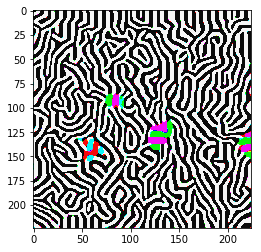

In [30]:
plt.imshow(v_img)